# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [27]:
df = pd.read_excel("Personality.xlsx")

df.head()

,Name,Post/Share frequently,Active,Replies to comments/messages,# of friends/followers,Personality
0,Bea,1,1,1,603,1
1,Janella,1,1,0,272,0
2,Matthew,0,0,0,177,1
3,Grace,1,1,0,648,1
4,Robby,1,1,1,710,1


Display the summary of all the features of the dataset using `.info()`

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Name                          99 non-null     object
 1   Post/Share frequently         99 non-null     int64 
 2   Active                        99 non-null     int64 
 3   Replies to comments/messages  99 non-null     int64 
 4   # of friends/followers        99 non-null     int64 
 5   Personality                   99 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [29]:
df.value_counts()

,,,,,,count
Name,Post/Share frequently,Active,Replies to comments/messages,# of friends/followers,Personality,
Aabla,1,1,1,1045,1,1
Aaron,1,1,1,314,1,1
Adrian,0,1,1,558,1,1
Aileen,1,1,0,250,1,1
Aldrich,0,1,0,462,1,1
...,...,...,...,...,...,...
Trixia,1,1,0,248,0,1
Xyrene,0,1,0,812,1,1
Xyrusse,0,0,0,183,0,1


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

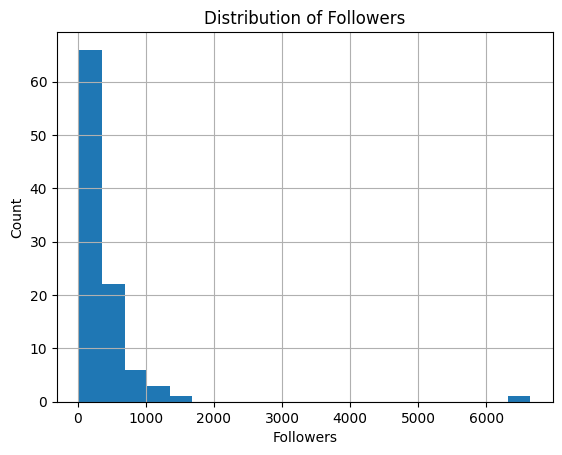

In [30]:
df['# of friends/followers'].hist(bins=20)
plt.xlabel("Followers")
plt.ylabel("Count")
plt.title("Distribution of Followers")
plt.show()

Remove the name column using `drop()` method

In [31]:
X = df.drop(columns=['Name'], inplace=True)

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [32]:
X = df.drop("Personality", axis=1).values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [33]:
y = df["Personality"].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Display the dimensions of each variables using `.shape()`

In [35]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (79, 4)
X_test: (20, 4)
y_train: (79,)
y_test: (20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)

Train the model using the `.fit()`

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Test the model using the `.predict()`

In [38]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

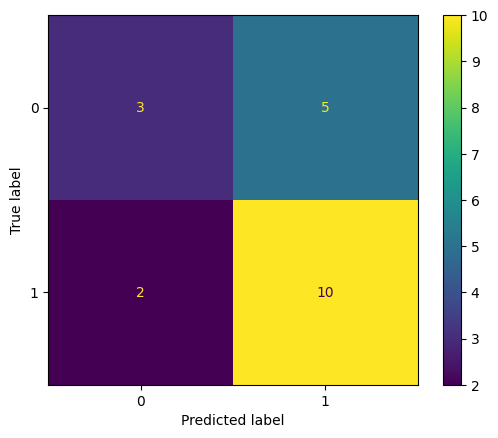

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Display the accuracy

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.65


Display the precision

In [41]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6666666666666666


Display the recall

In [42]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.8333333333333334


Display the f1-score

In [43]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.7407407407407407


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [44]:
my_features = [[1, 1, 1, 500]]
my_prediction = knn.predict(my_features)
print("My Personality Prediction:", my_prediction)

My Personality Prediction: [1]
